<a href="https://colab.research.google.com/github/mbn75/udemy_python_0_hero_capstone/blob/main/Capstone_Project_Hangman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the development of a word guessing game... **Word of the Day Hangman**!  Avoid making six wrong guesses of either letters or words and keep your stick figure "alive" in order to win.  Don't let your stick figure meet a terrible fate!

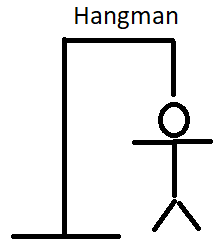

Objectives:


*   Use Web scrapping to select the "word of the day" from an online dictionary website
*   Using functions or class objects and user interface for playing the game.  Play ends when player guess the word correctly, guesses all the letters correctly or play makes six wrong guesses in the game.
*   Create a graphical interface to display correct and incorrect guesses and the stick figure





# **Library Imports**

In [1]:
#Import libraries

#web scrapping
import requests, bs4, lxml

#regular expressions
import re

#random integer
import random

#Import pillow and operating system libraries
from PIL import Image
import os

#clear output
from google.colab import output

# **Site requests and soup making**

In [2]:
#Make site requests
dictionary_dot_com = requests.get('https://www.dictionary.com/e/word-of-the-day/')
#merriam_webster = requests.get('https://www.merriam-webster.com/word-of-the-day')
#collins = requests.get('https://www.collinsdictionary.com/dictionary/english')

#Make soups
dict_soup = bs4.BeautifulSoup(dictionary_dot_com.text, 'lxml') #Dictionary.com soup
#m_w_soup = bs4.BeautifulSoup(merriam_webster.text, 'lxml') #Merriam-Webster.com soup
#coll_soup = bs4.BeautifulSoup(collins.text, 'lxml') #CollinsDistionary.com soup

# **Getting word, word type, and definition from Dictionary.com soup**

In [3]:
#Get word.  Distionary.com word pattern is: "Word of the Day - <the_word> | Dictionary.com".  
#This can be found in the soup using the 'title' tag at the beginning of the list object

word_pattern = '([^Word of the Day - ](\S+))' #This regular expression picks out <the_word> from the string by excluding phrase "Word of the Day - " using the ^ (hat) operator

text = dict_soup.select('title')[0].getText()
word_spelling = re.search(word_pattern, text).group()
#word_spelling

In [4]:
#Get word type.  Cleaning up the string is not as critical since it will not affect game play.
type_pattern = '\S+' #straight forward regular expression.  Using "S" and "+" to get alpha no whitespace

text = dict_soup.select('p')[2].getText()
word_type = re.search(type_pattern, text).group()
#word_type

In [5]:
#Get definition. Cleaning up the string is not as critical since it will not affect game play.
word_defition = dict_soup.select('p')[3].getText() #Just get the text without use of regular expression
#word_defition

In [6]:
#Create a dictionary for Dictionary.com word of the day
dict_dict = {'spelling':word_spelling, 'type':word_type, 'definition':word_defition}
dict_dict

{'definition': 'a person of great wit or intellect.',
 'spelling': 'bel-esprit',
 'type': 'noun'}

# **Not Used: Getting word, word type, and defintion from Merriam-Webster.com soup**

In [ ]:
#Upon further testing m_w_dictionary site is more difficult to scrape.  Will need to troubleshoot later if I still have desire.

In [ ]:
#merriam-webster.com word pattern is: "Word of the Day: <the_word> | Merriam-Webster".  This can be found in the soup using the 'title' tag at the beginning of the list object

#word_pattern = '([^Word of the Day: ](\S+))' #This regular expression picks out <the_word> from the string by excluding phrase "Word of the Day: " using the ^ (hat) operator
#text = m_w_soup.select('title')[0].getText()
#word = re.search(word_pattern, text).group()
#word

In [ ]:
#Finding the word in the list
"""
for i in range(len(m_w_soup.select('span'))):
  print(str(i) + " " + m_w_soup.select('span')[i].getText())
"""
#word_type = m_w_soup.select('span')[14].getText()
#word_type

'\nfor i in range(len(m_w_soup.select(\'span\'))):\n  print(str(i) + " " + m_w_soup.select(\'span\')[i].getText())\n'

In [ ]:
#text = m_w_soup.select('p')[0].getText()
#word_def = re.search('[^: ](\S+)', text).group()
#word_def

In [ ]:
#Create a dictionary for Merriam-Webster.com word of the day
#m_w_dict = {'word':word, 'type':word_type, 'definition':word_def}
#m_w_dict

# **NOT USED: Randomly select a dictionary word of the day for use for hangman**

In [ ]:
#Not needed.  Only using Dictionary.com scrape
'''
if random.randint(0,1) == 1:
  hangman_dict = dict_dict
else:
  hangman_dict = m_w_dict
#hangman_dict
'''

'\nif random.randint(0,1) == 1:\n  hangman_dict = dict_dict\nelse:\n  hangman_dict = m_w_dict\n#hangman_dict\n'

# **Game visual display function**

In [7]:
#Game play display function
def hangman_display(num=0):
  '''
  The hangman display function accepts one arguement, integer in the range [0:6]
  If values in range then uses if-then logic to display hangman
  If argument not in range then prints a statement about error
  '''
  #make sure the current working directory is set
  os.chdir('/content/drive/MyDrive/Colab Notebooks/udemy_python_0_hero_capstone')
  #print(os.getcwd())
  output.clear()
  try:
    if num == 0:
      print('No wrong guesses')
      hangman_pic = Image.open('0_zero.PNG') #Mounted Google Drive to colab notebook
    elif num == 1:
      print('One wrong guess')
      hangman_pic = Image.open('1_one.PNG')
    elif num == 2:
      print('Two wrong guesses')
      hangman_pic = Image.open('2_two.PNG')
    elif num == 3:
      print('Three wrong guesses')
      hangman_pic = Image.open('3_three.PNG')
    elif num == 4:
      print('Four wrong guesses')
      hangman_pic = Image.open('4_four.PNG')
    elif num == 5:
      print('Five wrong guesses')
      hangman_pic = Image.open('5_five.PNG')
    elif num == 6:
      print('Six wrong guesses. Game Over!')
      hangman_pic = Image.open('6_six.PNG')
    else:
      pass
    return hangman_pic
  except:
    print('Error! This function only accepts integer values in the range [0:6].')

Three wrong guesses


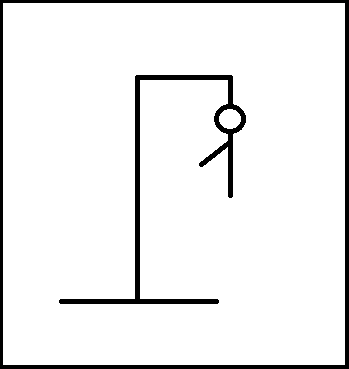

In [8]:
#Game display function testing
hangman_display(3)

# **Hangman word class**

In [132]:
class HangmanWord():
  '''
  HangmanWord class 
  - attributes: spelling, word_type, definition all of string type
  - methods: self, guess

  '''
  
  def __init__(self, spelling='', word_type='', definition=''):

    #Class Attributes
    self.spelling = spelling
    self.word_type = word_type
    self.definition = definition
    self.word_list = [char for char in spelling]
    self.guessing_list = [' ']*len(self.spelling)

  #Self.print method
  def __str__(self):
    return f"The Word of the Day is: '{self.spelling}'\nIt is a {self.word_type}.\nThe definition is: '{self.definition}''"

  #self.lenth method
  def __len__(self):
    return len(self.spelling)

  #Guessing method
  def guess(self,letter=''):
    try:
      if len(letter) == 1 or len(letter) == len(self.spelling): #Only accepts single or full word guesses
        start = 0 #Starting position for index loop.  Needed to find all instances of a repeated letter
        for char in self.word_list:
          if letter == char:
            self.guessing_list[self.word_list.index(char, start)] = letter
          else:
            pass
          start = start + 1

        return letter.lower() in self.spelling.lower()
      else:
        return 'Single letter or whole word guessess only. Partial word guesses not allowed.'
    except:
      return 'This method only accepts string arguements.  Please enter your argument as a string.'

In [110]:
game_word = HangmanWord(spelling=dict_dict['spelling']
                        ,word_type=dict_dict['type']
                        ,definition=dict_dict['definition'])

In [133]:
game_word = HangmanWord(spelling='Mississippi'
                        ,word_type='noun'
                        ,definition='name of state')

In [137]:
game_word.guessing_list

[' ', 'i', ' ', ' ', 'i', ' ', ' ', 'i', ' ', ' ', 'i']

In [135]:
game_word.word_list

['M', 'i', 's', 's', 'i', 's', 's', 'i', 'p', 'p', 'i']

In [121]:
game_word.guessing_list == game_word.word_list

False

In [123]:
game_word.word_list.count('s')

4

In [136]:
game_word.guess(input('make a guess: '))

make a guess: i


True

# **Game Play Logic**

In [ ]:
# Start the game
  # Welcome
  #Display screen
  #show how many letters need to be guessed
  #pre-populate non alpha characters like "-"

# loop Take input of letter/word guess
  #Did the player loose with too many wrong guesses
    #If incorrect guess and wrong guess less than 6 then update screen, add to wrong guess count and display wrong guess list
    #Did play guess word?

In [ ]:
print(ord('a'))
print(ord('z'))

alphabet = set()
for letter in range(ord('a'),ord('z')+1):
  alphabet.add(chr(letter))
print(alphabet)

print('y' in guess_list)
print('y' in alphabet)


97
122
{'y', 'a', 'v', 'k', 'q', 'e', 'b', 'l', 'o', 's', 'f', 'm', 't', 'n', 'x', 'g', 'i', 'w', 'u', 'c', 'z', 'h', 'r', 'd', 'p', 'j'}
False
True


In [ ]:
alphabet.discard('y') #remove a letter from alphabet set
print('y' in guess_list)
print('y' in alphabet)

False
False
